In [1]:
if 1:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if 1:
    !cp -r /content/drive/MyDrive/HomeWork5 /content/

In [3]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 21.0 MB/s 


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import tensorflow_addons as tfa
from keras import layers
import tensorflow as tf


# Input data files are available in the "/content/digit-recognizer/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

# Load Data

In [5]:
X_train = np.load('/content/HomeWork5/data/DataForClassification_TimeDomain.npy')
X_train = np.transpose(X_train)
print(X_train.shape)

(936, 3600)


In [6]:
Y_train = np.zeros((936,1))
label=0
print(label)
for i in range(936):

  Y_train[i]=label
  if (i%104==0) and (i!=0):
     label = label +1
     print(label)

0
1
2
3
4
5
6
7
8


In [7]:
Y_train[104:103*2]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [8]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [9]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 9)
print(Y_train[101,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Plot Digits

In [10]:
#Train-Test Split
X_dev, X_test, Y_dev, Y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True, random_state=45) # % 80 train % 20 test 

X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.125, shuffle=True, random_state=45) # %70 train %10 val
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_test.shape)

(654, 3600)
(94, 3600)
(188, 3600)
(188, 9)


In [11]:
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)
Y_test = np.expand_dims(Y_test, axis=1)

# Create GRU Model

In [12]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(1, 3600 ), return_sequences=True))
model.add(layers.Dense(8))
model.add(Dense(9, activation='softmax')) 

In [13]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 32)             348864    
                                                                 
 dense (Dense)               (None, 1, 8)              264       
                                                                 
 dense_1 (Dense)             (None, 1, 9)              81        
                                                                 
Total params: 349,209
Trainable params: 349,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Model Save and Early Stop

In [15]:

model_name_save= '/content/nn_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=12, verbose=1,  mode='max',restore_best_weights=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.3, patience=7,  min_lr=1e-5, verbose=1,  mode='max')


# Training Model CNN

In [16]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=64,callbacks=[checkpoint,early_stop,reduce_lr])

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.8665 - accuracy: 0.4144
Epoch 1: val_accuracy improved from -inf to 0.60638, saving model to /content/nn_model.hdf5
11/11 [==============================] - 4s 87ms/step - loss: 1.8665 - accuracy: 0.4144 - val_loss: 1.5293 - val_accuracy: 0.6064 - lr: 0.0010
Epoch 2/50
10/11 [==========================>...] - ETA: 0s - loss: 1.3088 - accuracy: 0.6969
Epoch 2: val_accuracy improved from 0.60638 to 0.70213, saving model to /content/nn_model.hdf5
11/11 [==============================] - 0s 19ms/step - loss: 1.3034 - accuracy: 0.6957 - val_loss: 1.1298 - val_accuracy: 0.7021 - lr: 0.0010
Epoch 3/50
 6/11 [===============>..............] - ETA: 0s - loss: 0.9800 - accuracy: 0.7760
Epoch 3: val_accuracy improved from 0.70213 to 0.89362, saving model to /content/nn_model.hdf5
11/11 [==============================] - 0s 17ms/step - loss: 0.9602 - accuracy: 0.7936 - val_loss: 0.8746 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 4

# Load Model

In [17]:
model.load_weights(model_name_save)

# Let's predict test data

In [18]:
y_pred = model.predict(X_test, batch_size=1)
y_pred = y_pred.squeeze()
y_pred = np.argmax(y_pred, axis=1)



188/188 [==============================] - 1s 2ms/step


In [19]:
y_pred.shape

(188,)

In [20]:
y_pred=np.expand_dims(y_pred,axis=1)

In [21]:
Y_test=np.argmax(Y_test,axis=2)

In [22]:
Y_test.shape


(188, 1)

In [23]:
y_pred.shape

(188, 1)

In [24]:
Y_test

array([[6],
       [1],
       [2],
       [3],
       [4],
       [8],
       [2],
       [2],
       [8],
       [4],
       [8],
       [8],
       [6],
       [8],
       [8],
       [6],
       [3],
       [1],
       [1],
       [1],
       [0],
       [5],
       [8],
       [8],
       [6],
       [5],
       [5],
       [8],
       [6],
       [4],
       [2],
       [7],
       [4],
       [3],
       [0],
       [4],
       [3],
       [8],
       [6],
       [2],
       [5],
       [2],
       [8],
       [0],
       [1],
       [8],
       [7],
       [8],
       [2],
       [7],
       [4],
       [5],
       [1],
       [5],
       [7],
       [8],
       [8],
       [2],
       [7],
       [0],
       [4],
       [2],
       [7],
       [3],
       [0],
       [3],
       [4],
       [7],
       [3],
       [2],
       [4],
       [5],
       [5],
       [4],
       [7],
       [6],
       [4],
       [5],
       [7],
       [0],
       [0],
       [5],
       [5],
    

In [25]:
y_pred

array([[6],
       [1],
       [2],
       [3],
       [4],
       [8],
       [2],
       [2],
       [8],
       [4],
       [8],
       [8],
       [6],
       [8],
       [8],
       [6],
       [3],
       [1],
       [1],
       [1],
       [0],
       [5],
       [8],
       [8],
       [6],
       [5],
       [5],
       [8],
       [6],
       [4],
       [2],
       [7],
       [4],
       [3],
       [0],
       [4],
       [3],
       [8],
       [6],
       [2],
       [5],
       [2],
       [8],
       [0],
       [1],
       [8],
       [7],
       [8],
       [7],
       [7],
       [4],
       [5],
       [1],
       [5],
       [7],
       [8],
       [8],
       [2],
       [7],
       [0],
       [4],
       [2],
       [7],
       [3],
       [0],
       [3],
       [4],
       [7],
       [3],
       [2],
       [4],
       [5],
       [5],
       [4],
       [7],
       [7],
       [4],
       [5],
       [7],
       [0],
       [0],
       [5],
       [5],
    

# Visualization model training

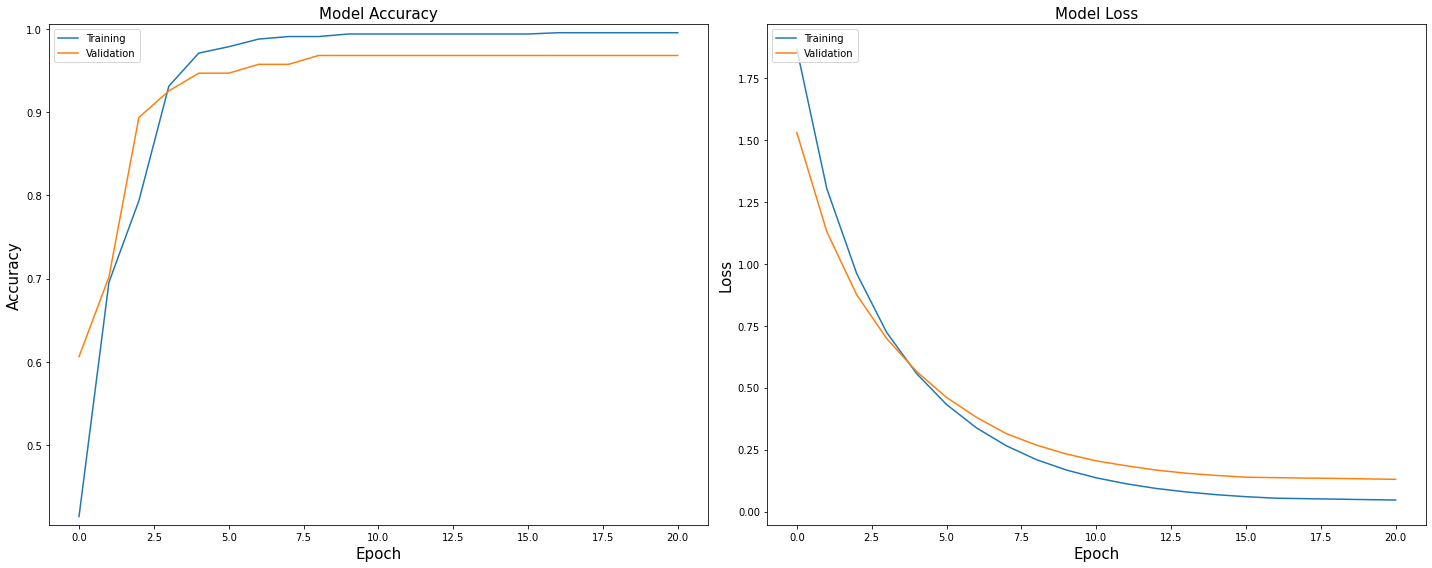

In [26]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]
plt.figure(figsize=(20, 8))

# Plot training & validation Accuracy values
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]

plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.tight_layout()  
                         
# Plot training & validation loss values
y1 = history.history['loss']
y2 = history.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')

plt.tight_layout()                  
plt.show()

# Accuracy score, confusion matrix and f1 score

Result Confusion Matrix
------------------------------------------------------------------------------------------
Accuracy:  96.27659574468085 %
Precision:  96.44688644688644 %
Recall:  95.91485728912629 %
f1:  96.07082966031535 %


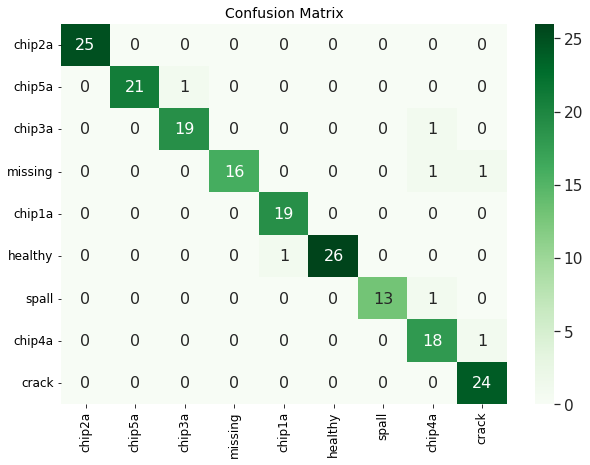

Sensitivity: 100.00%
Specificity: 100.00%


              precision    recall  f1-score   support

      chip2a       1.00      1.00      1.00        25
      chip5a       1.00      0.95      0.98        22
      chip3a       0.95      0.95      0.95        20
     missing       1.00      0.89      0.94        18
      chip1a       0.95      1.00      0.97        19
     healthy       1.00      0.96      0.98        27
       spall       1.00      0.93      0.96        14
      chip4a       0.86      0.95      0.90        19
       crack       0.92      1.00      0.96        24

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.97      0.96      0.96       188



In [27]:
def scores(y_true,Y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred,average='macro')
  recall = recall_score(y_true,y_pred,average='macro')
  f1 = f1_score(y_true,y_pred,average='macro')
  confusionmatrix = confusion_matrix(y_true, y_pred)
  print("="*90)
  print("Result Confusion Matrix")
  print("-"*90)
  print("Accuracy: ", accuracy*100, "%")
  print("Precision: ", precision*100, "%")
  print("Recall: ", recall*100, "%")
 
  print("f1: ", f1*100, "%")
  print("="*90)
  labels = {'healthy','missing','crack','spall','chip5a','chip4a','chip3a','chip2a','chip1a'}
  df_cm = pd.DataFrame(confusionmatrix, labels,labels)
  plt.figure(figsize=(10,7))
  plt.title("Confusion Matrix", fontsize=14)
  plt.xticks(range(len(labels)), labels, fontsize=12,rotation="vertical")
  plt.yticks(range(len(labels)), labels, fontsize=12)
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, cmap='Greens', annot_kws={"size": 16}) # font size

  plt.show()

  cls_report_print = classification_report(y_true, y_pred, target_names=labels)
  cls_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
  total1=sum(sum(confusionmatrix))

  ##### From confusion matrix calculate accuracy
  print("="*90)
  sensitivity1 = confusionmatrix[0,0]/(confusionmatrix[0,0]+confusionmatrix[0,1])
  print("%s%.2f%s"% ("Sensitivity: ", sensitivity1*100, "%"))
  specificity1 = confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1])
  print("%s%.2f%s"% ("Specificity: ", specificity1*100, "%"))

  print("\n")
  print("="*90)
  print("="*90)
  print(cls_report_print)
  print("="*90)

scores(Y_test,y_pred)